<a href="https://colab.research.google.com/github/John-G-Thomas/Prodjects/blob/master/Project_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0) Imports

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import matplotlib.style as style
import warnings
import datetime as datetime
warnings.filterwarnings('ignore')

- Begin to analyze and visualize your data. Try and have all data cleaning and reshaping wrapped up by the end of the first day so as to allow you ample time to create super awesome visualizations.

### 1) This is the main dataset it will show increase average temperature by countinent from selected countries. I will being trying to understand global warming better and diving deeper into outliers - ( 1743 - Present)

In [123]:
Country_Temps = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
print(Country_Temps.shape)
Country_Temps.head()

(577462, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [124]:
Country_Temps.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [125]:
Country_Temps.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [127]:
Country_Temps['dt'] = pd.to_datetime(Country_Temps['dt'], infer_datetime_format=True)
Country_Temps['Year'] = Country_Temps['dt'].dt.year

In [128]:
Country_Temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,NaN,NaN,Åland,1743
2,1744-01-01,NaN,NaN,Åland,1744
3,1744-02-01,NaN,NaN,Åland,1744
4,1744-03-01,NaN,NaN,Åland,1744


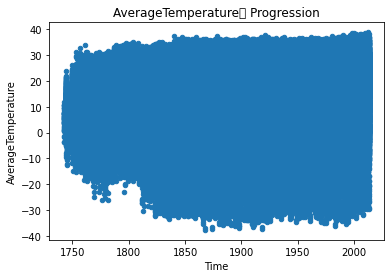

In [129]:
Country_Temps.plot.scatter('Year', "AverageTemperature")
plt.title('AverageTemperature	 Progression')
plt.xlabel('Time')
plt.ylabel('AverageTemperature');

In [130]:
select_country = Country_Temps.loc[Country_Temps['Country'] == 'United States']

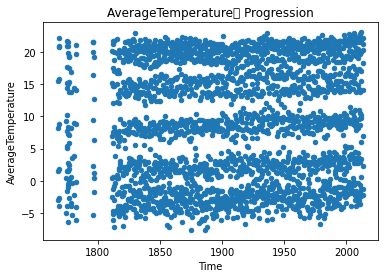

In [131]:
select_country.plot.scatter('Year', "AverageTemperature")
plt.title('AverageTemperature	 Progression')
plt.xlabel('Time')
plt.ylabel('AverageTemperature');

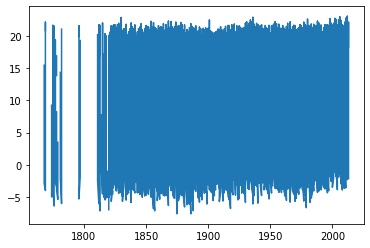

In [132]:
plt.plot(select_country.Year, select_country.AverageTemperature)
plt.show()

### 2) With this dataset I will be showing the Uncentainty and land Average global temperature increasing from 1750 - present(Monthly)

In [283]:
GlobalTemps = pd.read_csv('GlobalTemperatures.csv')
print(GlobalTemps.shape)
GlobalTemps.head()

(3192, 9)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
GlobalTemps.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [301]:
GlobalTemps['dt'] = pd.to_datetime(GlobalTemps['dt'], infer_datetime_format=True)
GlobalTemps['date'] = GlobalTemps['dt'].dt.strftime('%Y')

In [302]:
GlobalTemps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [300]:
df = GlobalTemps.drop(columns=['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty','LandAndOceanAverageTemperature'])
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date
0,1750-01-01,3.034,3.574,1750
1,1750-02-01,3.083,3.702,1750
2,1750-03-01,5.626,3.076,1750
3,1750-04-01,8.490,2.451,1750
4,1750-05-01,11.573,2.072,1750


In [303]:
df['UpperBounds'] = (df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty'])
df['LowerBounds'] = (df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty'])

In [304]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date,UpperBounds,LowerBounds
0,1750-01-01,3.034,3.574,1750,6.608,-0.540
1,1750-02-01,3.083,3.702,1750,6.785,-0.619
2,1750-03-01,5.626,3.076,1750,8.702,2.550
3,1750-04-01,8.490,2.451,1750,10.941,6.039
4,1750-05-01,11.573,2.072,1750,13.645,9.501


In [305]:
df['date'][0]

'1750'

In [315]:
dates = '1750'

In [316]:
def date(cell_contents):
  return int(cell_contents)

In [317]:
type(date(dates))

int

In [318]:
cleaned = []

for dates in df['date']:
  cleaned.append(date(dates))

df['date'] = pd.Series(cleaned)

In [ ]:
# Graph average temperatures from counties

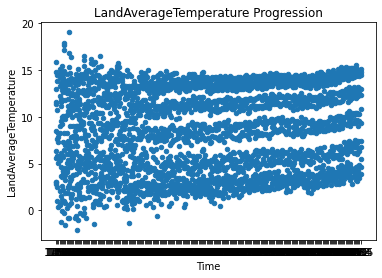

In [309]:
df.plot.scatter('date', "LandAverageTemperature")
plt.title('LandAverageTemperature Progression')
plt.xlabel('Time')
plt.ylabel('LandAverageTemperature');

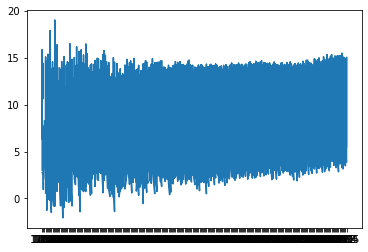

In [312]:
plt.plot(df.date, df.LandAverageTemperature)
plt.show()

In [336]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date,UpperBounds,LowerBounds
0,1750-01-01,3.034,3.574,1750,6.608,-0.540
1,1750-02-01,3.083,3.702,1750,6.785,-0.619
2,1750-03-01,5.626,3.076,1750,8.702,2.550
3,1750-04-01,8.490,2.451,1750,10.941,6.039
4,1750-05-01,11.573,2.072,1750,13.645,9.501


In [ ]:
# Final Cleaning

In [344]:
h = df.groupby(["date"])
yearly_average = h.aggregate({"LandAverageTemperature":np.mean})

In [345]:
yearly_average['Upper_Uncertainty'] = h.aggregate({"UpperBounds":np.mean})

In [346]:
yearly_average['Lower_Uncertainty'] = h.aggregate({"LowerBounds":np.mean})
yearly_average

,LandAverageTemperature,Upper_Uncertainty,Lower_Uncertainty
date,,,
1750,8.719364,11.357182,6.081545
1751,7.976143,10.757286,5.195000
1752,5.779833,8.756833,2.802833
1753,8.388083,11.564083,5.212083
1754,8.469333,11.963583,4.975083
...,...,...,...
2011,9.516000,9.598000,9.434000
2012,9.507333,9.590750,9.423917
2013,9.606500,9.704167,9.508833


In [352]:
mylist = df.date
mylist = list(dict.fromkeys(mylist))

In [353]:
yearly_average['Year']= mylist

### 3) Dataset on Carbon Emmisions by Country - (1751 - present)

In [147]:
Country_Greenhouse_gas = pd.read_csv('https://pkgstore.datahub.io/core/co2-fossil-by-nation/fossil-fuel-co2-emissions-by-nation_csv/data/0f04181960a0a896ebaf6d8afb0b71a6/fossil-fuel-co2-emissions-by-nation_csv.csv')
print(Country_Greenhouse_gas.shape)
Country_Greenhouse_gas.head()

(17232, 10)


,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [148]:
Country_Greenhouse_gas['Country'].unique()

array(['UNITED KINGDOM', 'CANADA', 'GERMANY', 'POLAND',
       'UNITED STATES OF AMERICA', 'BELGIUM', 'FRANCE (INCLUDING MONACO)',
       'AUSTRIA', 'NORWAY', 'HUNGARY', 'SPAIN', 'USSR', 'SWEDEN',
       'DENMARK', 'NETHERLANDS', 'IRELAND', 'AUSTRALIA', 'ROMANIA',
       'INDIA', 'SWITZERLAND', 'CZECHOSLOVAKIA', 'FINLAND',
       'ITALY (INCLUDING SAN MARINO)', 'TURKEY', 'GREECE',
       'JAPAN (EXCLUDING THE RUYUKU ISLANDS)', 'PORTUGAL', 'NEW ZEALAND',
       'BULGARIA', 'YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC)',
       'PERU', 'SOUTH AFRICA', 'ARGENTINA', 'INDONESIA',
       'PENINSULAR MALAYSIA', 'MEXICO', 'VIET NAM', 'CHILE', 'TAIWAN',
       'CHINA (MAINLAND)', 'ALGERIA', 'BRAZIL',
       'ISLAMIC REPUBLIC OF IRAN', 'ZIMBABWE', 'VENEZUELA',
       'UNITED KOREA', 'PHILIPPINES', 'TRINIDAD AND TOBAGO', 'EGYPT',
       'NIGERIA', 'TUNISIA', 'ECUADOR',
       'DEMOCRATIC REPUBLIC OF THE CONGO (FORMERLY ZAIRE)', 'PUERTO RICO',
       'COLOMBIA', 'IRAQ', 'SARAWAK', 'NETHERLAND AN

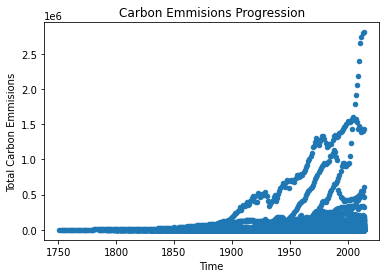

In [149]:
Country_Greenhouse_gas.plot.scatter('Year', "Total")
plt.title('Carbon Emmisions Progression')
plt.xlabel('Time')
plt.ylabel('Total Carbon Emmisions');

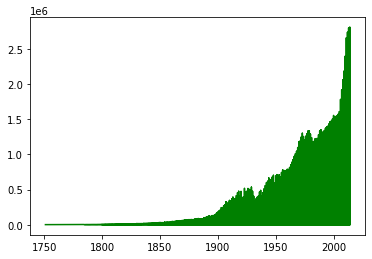

In [150]:
plt.plot(Country_Greenhouse_gas.Year, Country_Greenhouse_gas.Total, color='g')
plt.show()

In [151]:
Carbon_Emmisions = Country_Greenhouse_gas.pivot_table(index='Year', columns='Country', values='Total')

In [152]:
Carbon_Emmisions = Carbon_Emmisions[['UNITED STATES OF AMERICA', 'JAPAN', 'QATAR', 'INDIA', 'RUSSIAN FEDERATION', 'CHINA (MAINLAND)', 'BRAZIL', 'AUSTRALIA', 'GERMANY']]
Carbon_Emmisions

Country,UNITED STATES OF AMERICA,JAPAN,QATAR,INDIA,RUSSIAN FEDERATION,CHINA (MAINLAND),BRAZIL,AUSTRALIA,GERMANY
Year,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2010,1471375.0,319505.0,19773.0,468964.0,455558.0,2393248.0,114468.0,106589.0,206943.0
2011,1442509.0,324809.0,21935.0,502257.0,480885.0,2654360.0,119829.0,106850.0,199754.0
2012,1396083.0,335470.0,25668.0,550451.0,499272.0,2734817.0,128178.0,105843.0,201762.0


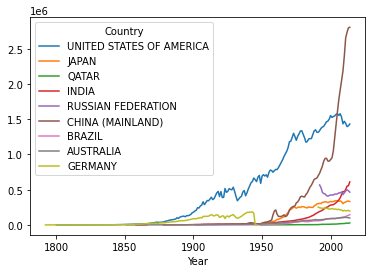

In [153]:
Carbon_Emmisions.plot();

In [154]:
mylist = Country_Greenhouse_gas.Year
mylist = list(dict.fromkeys(mylist))

In [155]:
Carbon_Emmisions['Year']= mylist

### 4) Polished explanatory visualizations On Carbon Emmisions

- Carbon Emmisions from top countries by regions UNITED STATES OF AMERICA, JAPAN, NIGER, INDIA, SAUDI ARABIA, RUSSIAN FEDERATION, CHINA (MAINLAND), BRAZIL, AUSTRALIA, GERMANY, MEXICO

In [ ]:
# Polished Dataframe for Carbon Emmisions

In [179]:
Carbon_Emmisions = Carbon_Emmisions.rename(columns={'UNITED STATES OF AMERICA': 'UNITED STATES'})
Carbon_Emmisions =Carbon_Emmisions.rename(columns={'CHINA (MAINLAND)': 'CHINA'})
Carbon_Emmisions =Carbon_Emmisions.rename(columns={'RUSSIAN FEDERATION': 'RUSSIA'})
Carbon_Emmisions.head()

Country,UNITED STATES,JAPAN,QATAR,INDIA,RUSSIA,CHINA,BRAZIL,AUSTRALIA,GERMANY,Year
Year,,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751
1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752
1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1753
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1754
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755


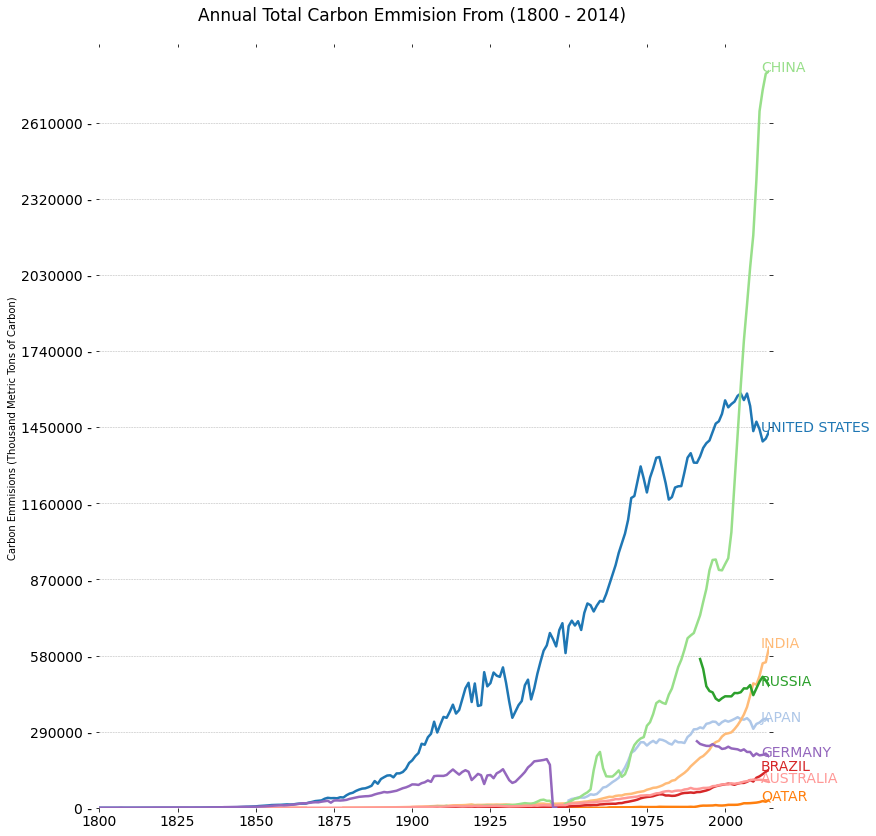

In [377]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
plt.figure(figsize=(12, 14))    
     
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(0, 2900000)    
plt.xlim(1800, 2014)    
   
plt.yticks(range(0, 2900000, 290000), [str(x) + " -" for x in range(0, 2900000, 290000)], fontsize=14)    
plt.xticks(fontsize=14)    
   
for y in range(290000, 2900000, 290000):    
    plt.plot(range(1800, 2014), [y] * len(range(1800, 2014)), "--", lw=0.5, color="black", alpha=0.3)    
     
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
majors = ['UNITED STATES', 'JAPAN', 'QATAR', 'INDIA', 'RUSSIA', 'CHINA', 'BRAZIL', 'AUSTRALIA', 'GERMANY']    
  
for rank, column in enumerate(majors):    

    plt.plot(Carbon_Emmisions.Year.values,    
            Carbon_Emmisions[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])        
    y_pos = Carbon_Emmisions[column.replace("\n", " ")].values[-1] - 0.5    

    if column == "UNITED STATES":    
        y_pos += 0.5    
    elif column == "JAPAN":    
        y_pos -= 0.5    
    elif column == "QATAR":    
        y_pos += 0.75    
    elif column == "INDIA":    
        y_pos -= 0.25      
    elif column == "RUSSIA":    
        y_pos += 0.25    
    elif column == "CHINA":    
        y_pos -= 0.75    
    elif column == "BRAZIL":    
        y_pos += 0.75    
    elif column == "AUSTRALIA":    
        y_pos -= .55    
    elif column == "GERMANY":    
        y_pos += 0.75      
# x and title labels
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])
plt.ylabel('Carbon Emmisions (Thousand Metric Tons of Carbon)')
plt.text(1900, 3000000, "Annual Total Carbon Emmision From (1800 - 2014)", fontsize=17, ha="center")     
plt.savefig("Carbon_Footprint.png", bbox_inches="tight") 

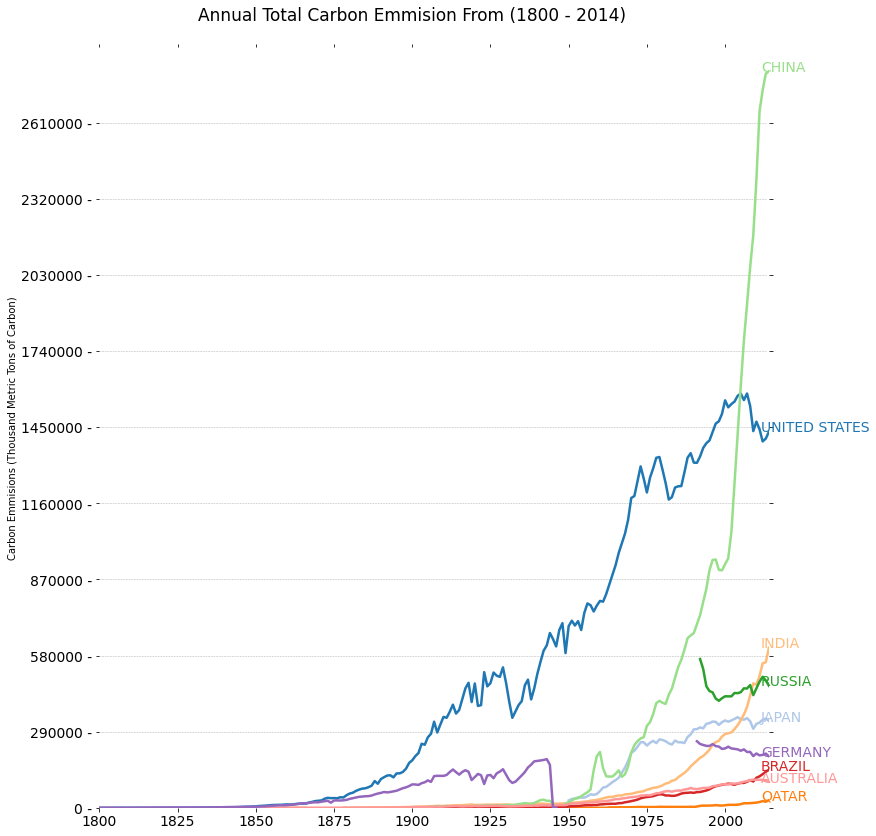

In [378]:
from IPython.display import display, Image
png = 'Carbon_Footprint.png'
example = Image(png, width=1030)
display(example)

### 5) Global Temperaturs 

In [ ]:
# Polished Dataframe for Carbon Emmisions for Global Temperatures

In [354]:
print(yearly_average.shape)
yearly_average.head()

(266, 4)


,LandAverageTemperature,Upper_Uncertainty,Lower_Uncertainty,Year
date,,,,
1750,8.719364,11.357182,6.081545,1750
1751,7.976143,10.757286,5.195000,1751
1752,5.779833,8.756833,2.802833,1752
1753,8.388083,11.564083,5.212083,1753
1754,8.469333,11.963583,4.975083,1754


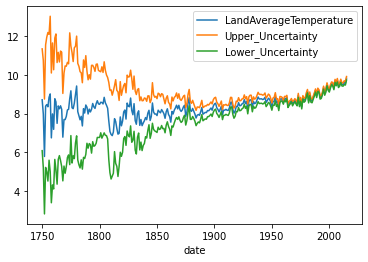

In [355]:
yearly_average[['LandAverageTemperature','Upper_Uncertainty','Lower_Uncertainty']].plot()
plt.show()

In [357]:
yearly_average.describe()

,LandAverageTemperature,Upper_Uncertainty,Lower_Uncertainty,Year
count,266.000000,266.000000,266.000000,266.000000
mean,8.369337,9.315056,7.423619,1882.500000
std,0.584921,0.912942,1.351780,76.931788
min,5.779833,8.169917,2.802833,1750.000000
25%,8.081562,8.703146,6.531563,1816.250000
50%,8.372167,8.956667,7.705958,1882.500000
75%,8.704167,9.693333,8.457771,1948.750000
max,9.831000,13.048000,9.738833,2015.000000


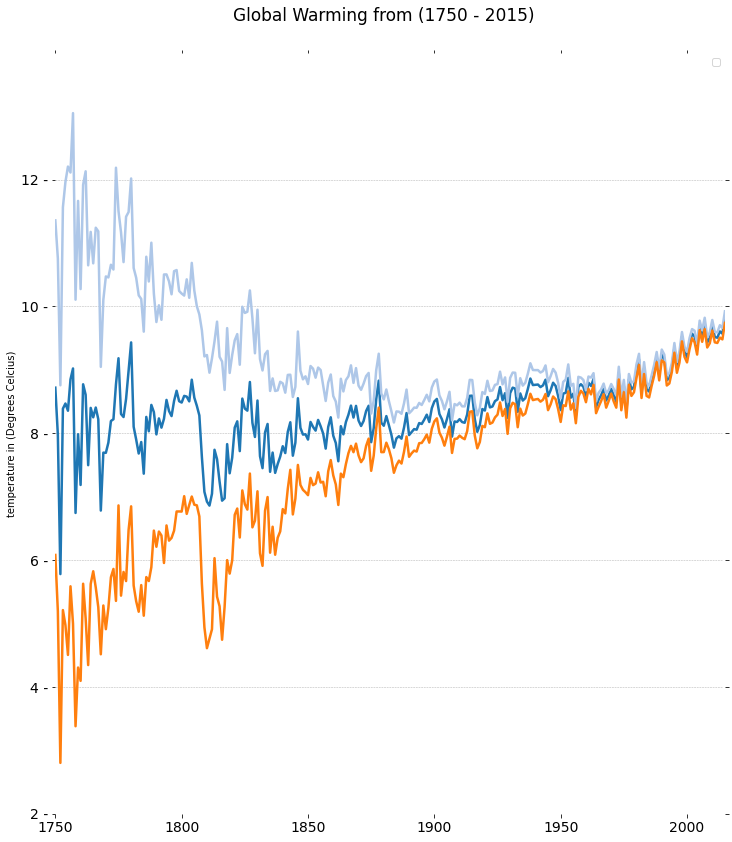

In [393]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
plt.figure(figsize=(12, 14))    
     
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
ax.legend('LandAverageTemperature')
plt.ylim(2, 14)    
plt.xlim(1750, 2015)    
   
plt.yticks(range(2, 14, 2), [str(x) + " -" for x in range(2, 14, 2)], fontsize=14)    
plt.xticks(fontsize=14)    
   
for y in range(2, 14, 2):    
    plt.plot(range(1750, 2015), [y] * len(range(1750, 2015)), "--", lw=0.5, color="black", alpha=0.3)    
     
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
majors = ['LandAverageTemperature', 'Upper_Uncertainty', 'Lower_Uncertainty']    

for rank, column in enumerate(majors):    

    plt.plot(yearly_average.Year.values,    
            yearly_average[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])        
    y_pos = yearly_average[column.replace("\n", " ")].values[-1] - 0.5    

    if column == "UNITED STATES":    
        y_pos += 0.5    
    elif column == "JAPAN":    
        y_pos -= 0.4   
    elif column == "QATAR":    
        y_pos += 0.75     
# x and title labels
    #plt.text(2011.5, y_pos, column, fontsize=8, color=tableau20[rank])    
plt.ylabel('temperature in (Degrees Celcius)')
plt.text(1880, 14.5, "Global Warming from (1750 - 2015)", fontsize=17, ha="center");
plt.savefig("Global_warming.png", bbox_inches="tight") 

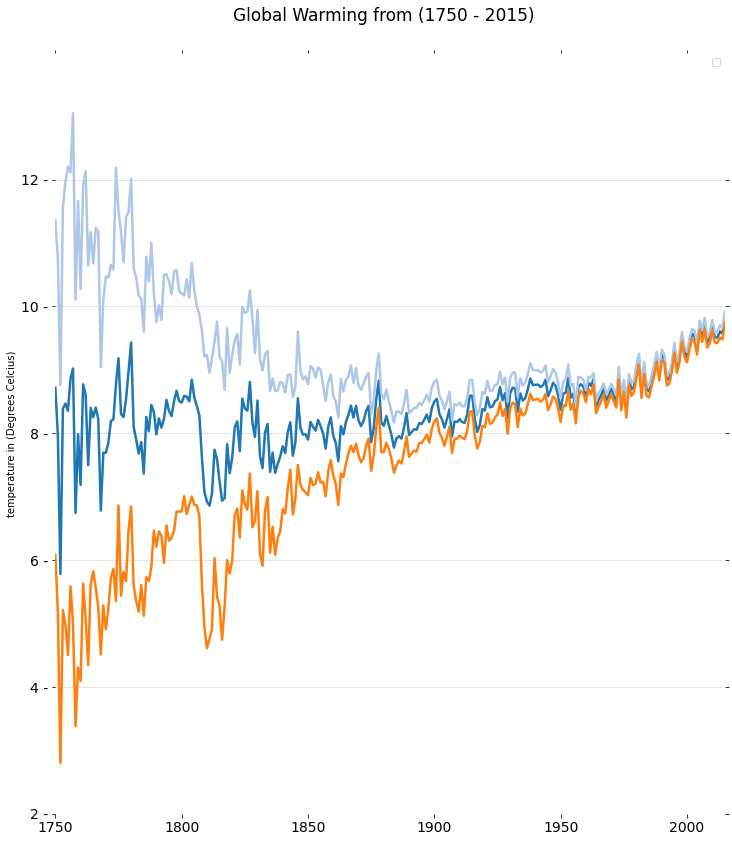

In [395]:
from IPython.display import display, Image
png = 'Global_warming.png'
example = Image(png, width=800)
display(example)